In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/Naive Bayes/spam.csv', encoding='latin-1')  # Replace with your file path
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# clean

In [11]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
df.columns = ['Label', 'Message']

# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Label      0
Message    0
dtype: int64
Duplicate rows: 403


In [ ]:
# feature eng

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance to convert text data into numerical features
vectorizer = CountVectorizer(stop_words='english')

# Convert the "Message" column into numerical features
X = vectorizer.fit_transform(df['Message'])

# Convert labels to numerical values: Spam = 1, Ham = 0
y = df['Label'].map({'spam': 1, 'ham': 0})


In [ ]:
# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and Train the Naive Bayes Model

In [23]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
 # Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9758220502901354
Confusion Matrix:
[[874  15]
 [ 10 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       889
           1       0.90      0.93      0.92       145

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



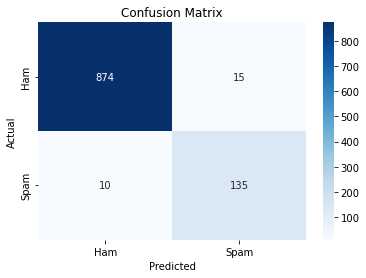

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Example of a new message
new_message = ["Congratulations! You've won a free gift card, click here to claim it!"]

# Transform the new message into the same format as the training data
new_message_transformed = vectorizer.transform(new_message)

# Predict if the new message is spam or not
prediction = nb_model.predict(new_message_transformed)

if prediction == 1:
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is spam.


In [29]:
# Example of a new message
new_message = ["Congratulations! You got job  click confirm!"]

# Transform the new message into the same format as the training data
new_message_transformed = vectorizer.transform(new_message)

# Predict if the new message is spam or not
prediction = nb_model.predict(new_message_transformed)

if prediction == 1:
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is not spam.
